# Clustering
In dit notebook vind je 3 opdrachten.
- <a href="#cl_opdracht1"> Opdracht 1 </a> maak je ter voorbereiding van het college. Je gaat hier aan de slag met kMeans.
- <a href="#cl_opdracht2"> Opdracht 2 </a> maak je ter voorbereiding van het college. Je gaat hier aan de slag met GMM's.
- <a href="#cl_oprdacht3"> Opdracht 3 </a> maken we in het college.

<a id="cl_opdracht1"></a>
## Opdracht 1

In deze oefening gaan we aan de slag met informatie uit onderstaande foto:

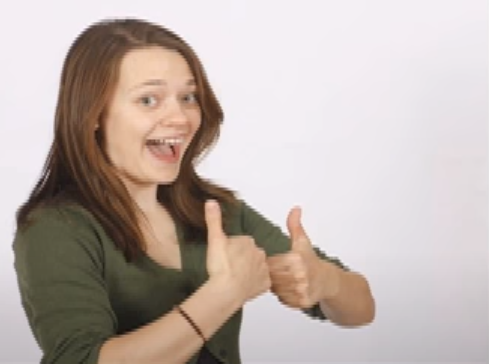

We nemen de RGB-waardes van een aantal pixels en gaan daar drie clusters voor zoeken. In feite ga je de unieke RGB-waarde van elke pixel vervangen door de RGB-waarde van het bijbehorende cluster. Dit is een vorm van *comprimeren*.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

Gegeven zijn 19 pixels uit de foto

In [2]:
RGB = [[247,247,247],
       [255,247,255],
       [234,234,234],
       [221,221,221],
       [247,234,247],
       [234,221,234],
       [255,255,255],
       [234,234,247],
       [234,221,221],
       [78,78,65],
       [65,65,52],
       [221,208,208],
       [78,78,52],
       [234,182,156],
       [247,247,255],
       [221,182,143],
       [104,78,52],
       [78,52,39],
       [104,78,65],
       [229,181,152],
       [225,177,148]]
len(RGB)

21

Ter illustratie de kleuren van de 21 pixels

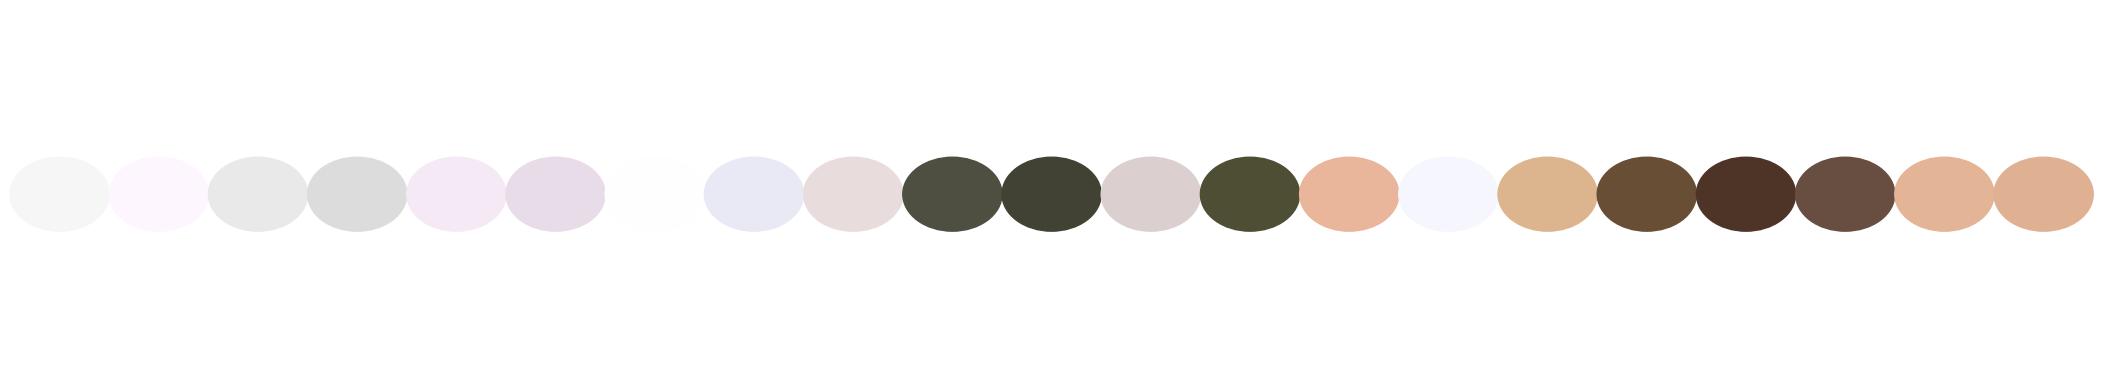

In [3]:
fig, ax = plt.subplots()

i = 0
for color in RGB:
    circle = plt.Circle((i*0.2, 0.5), 0.1, color=[c / 256 for c in color], clip_on=False)
    ax.add_artist(circle)
    i += 1
    
plt.axis('off')
plt.show()

### Opdracht 1a Clusters zoeken

Voer een clustering uit met kMeans. Neem als input de 21 pixels en ga met behulp van kMeans **3** clusters zoeken.

C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

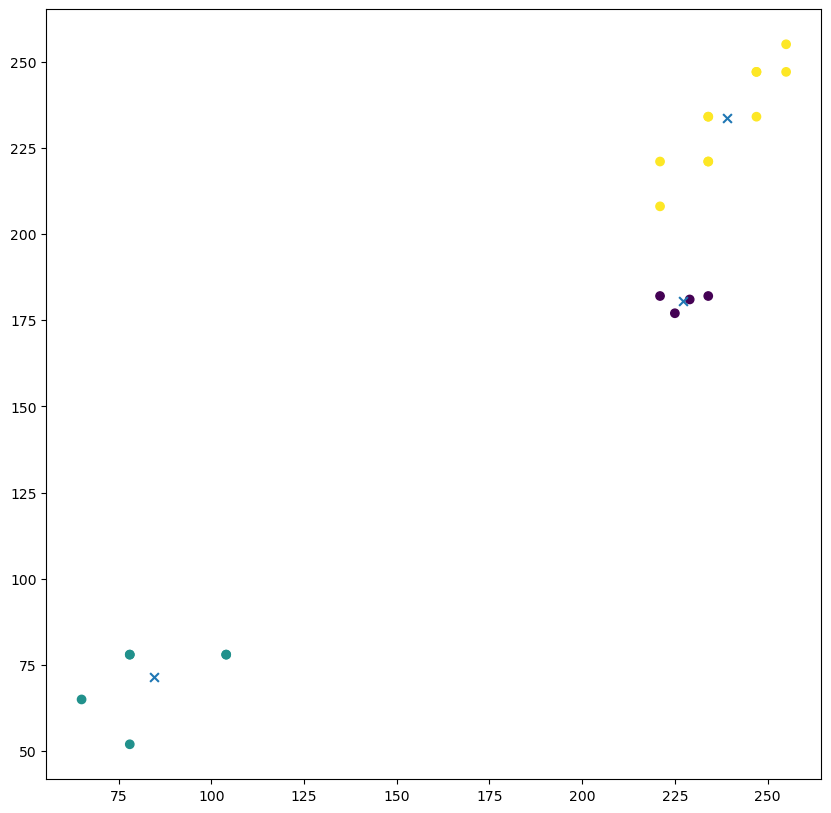

In [12]:
model_kMeans = KMeans()
number_clusters = 3
RGB_kMeans = np.array(RGB)
model_kMeans.set_params(n_clusters = number_clusters, random_state = 0)
model_kMeans.fit(RGB_kMeans)
prediction_kMeans = model_kMeans.fit_predict(RGB_kMeans)

plt.scatter(RGB_kMeans[:,0],RGB_kMeans[:,1],marker='o', c=prediction_kMeans)
plt.scatter(model_kMeans.cluster_centers_[:,0],model_kMeans.cluster_centers_[:,1],marker='x', s=40)
plt.gcf().set_size_inches((10, 10))  
plt.show()

# rgbMeans = KMeans(n_clusters=3, random_state=0).fit(RGB)

# print(rgbMeans.cluster_centers_)

# print(rgbMeans.predict([[11, 15, 10], [20, 4, 10]]))

Onderzoek wat de middelpunten van de clusters zijn en welke kleur daar bij hoort. Gebruik de code uit `In [3]:` om de clustermiddelpunten te visualiseren.

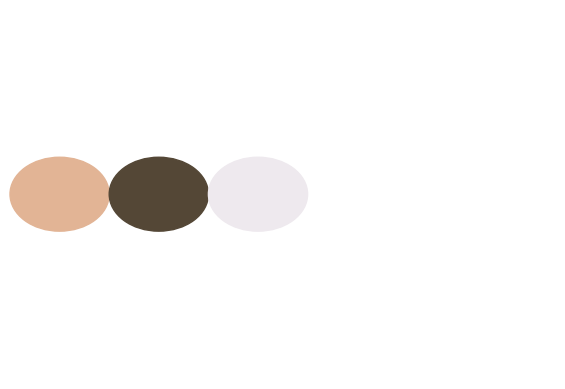

In [13]:
fig, ax = plt.subplots()

i = 0
for color in model_kMeans.cluster_centers_:
    circle = plt.Circle((i*0.2, 0.5), 0.1, color=[c / 256 for c in color], clip_on=False)
    ax.add_artist(circle)
    i += 1
    
plt.axis('off')
plt.show()

Als het goed is komen de RGB-waardes van de clusters ongeveer overeen met respectievelijk de trui, de achtergrond en het gezicht :

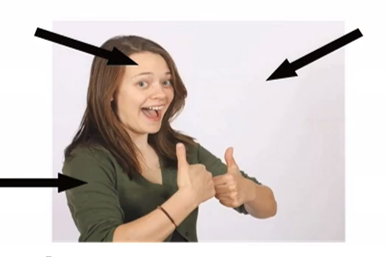

### Opdracht 1b Nieuwe punten aan clusters koppelen

Controleer bij welk cluster de volgende vier pixels horen volgens het model:
- [87,87,76]
- [244,235,237]
- [230, 175, 150 ]
- [255, 0, 0]

Dit zijn steekproeven van respectievelijk de trui, achtergrond en gezicht en een vierde willekeurige kleur die **niet** op de foto voorkomt.

In [14]:
colorsnap = np.array([[87, 87, 76], 
                      [244, 235, 237],
                      [230, 175, 150],
                      [255, 0, 0]])


In [18]:
color_snap_cluster_data = model_kMeans.predict(colorsnap)
print(color_snap_cluster_data)

[1 2 0 1]


Vergelijk de kleuren van de drie pixels met de middelpunten van de clusters om te zien of het overeen komt. Als het goed is zie je respectievelijk de kleuren van de trui, achtergrond en gezicht. En wat kun je zeggen over de voorspelling van het vierde punt?

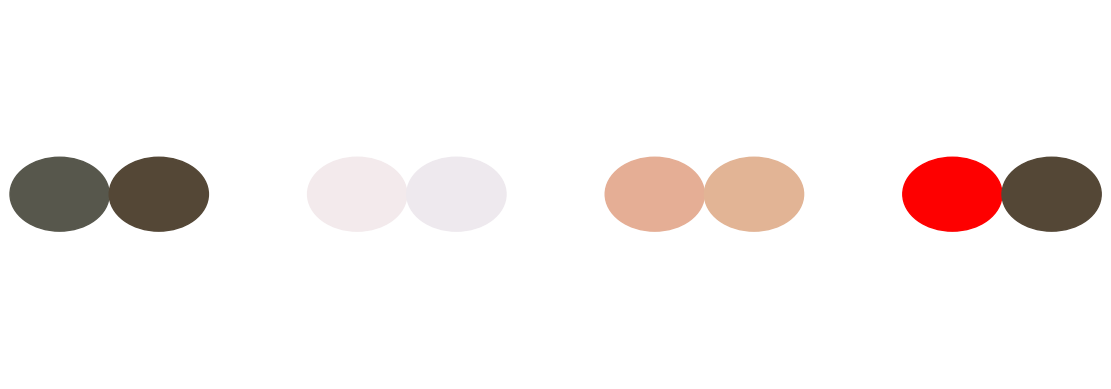

In [22]:
fig, ax = plt.subplots()
# model_kMeans.cluster_centers_
i = 0
for x, color in enumerate(colorsnap):
    circle = plt.Circle((i*0.2, 0.5), 0.1, color=[c / 256 for c in color], clip_on=False)
    
    cluster_color = model_kMeans.cluster_centers_[color_snap_cluster_data[x]]
    i += 1
    cluster_circle = plt.Circle((i*0.2, 0.5), 0.1, color=[c / 256 for c in cluster_color], clip_on=False)
    
    ax.add_artist(circle)
    ax.add_artist(cluster_circle)
    i += 2
    
plt.axis('off')
plt.show()

### Opdracht 1c Clusters visualiseren
Toon de clustering van de dataset (de eerste 19 pixels) in een diagram met op de assen de RGB-waarden. Geef elk cluster daarbij ook een kleur, zodat ze te onderscheiden zijn.

NB. Bij een 2D-visualisatie kun je natuurlijk maar twee van de drie RGB-waardes op de assen kwijt. Als je alle drie de assen tegelijk wilt tekenen, kan dat met een 3D-visualisatie. Gebruik hiervoor `fig.add_subplot(111, projection='3d')` als je dit wilt proberen.

In [23]:
from mpl_toolkits.mplot3d import Axes3D


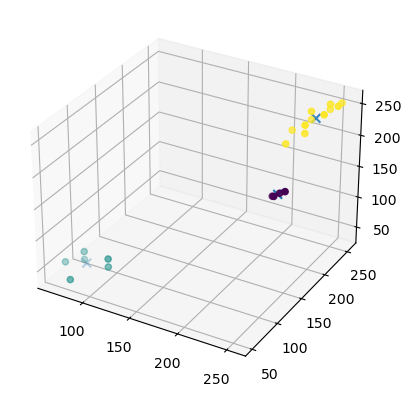

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# print(RGB_kMeans)
# print(model_kMeans.cluster_centers_)

ax.scatter(RGB_kMeans[:,0],RGB_kMeans[:,1],RGB_kMeans[:,2],marker='o', c=prediction_kMeans)
ax.scatter(model_kMeans.cluster_centers_[:,0],model_kMeans.cluster_centers_[:,1],model_kMeans.cluster_centers_[:,2], marker='x', s=40)
plt.show()

<a id="cl_opdracht2"></a>
## Opdracht 2

Bij oefening 1 zijn jullie aan de slag gegaan met onderstaande foto:
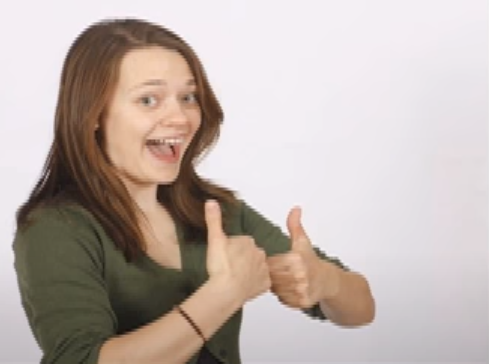

We gaan hetzelfde doen als in oefening 1, maar dan nu met Gaussian Mixture Models i.p.v. kMeans.

In [38]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

Gegeven zijn 21 pixels uit de foto

In [39]:
RGB = np.array([[247,247,247],
       [255,247,255],
       [234,234,234],
       [221,221,221],
       [247,234,247],
       [234,221,234],
       [255,255,255],
       [234,234,247],
       [234,221,221],
       [78,78,65],
       [65,65,52],
       [221,208,208],
       [78,78,52],
       [234,182,156],
       [247,247,255],
       [221,182,143],
       [104,78,52],
       [78,52,39],
       [104,78,65],
       [229,181,152],
       [225,177,148]])
len(RGB)

21

Ter illustratie de kleuren van de 21 pixels

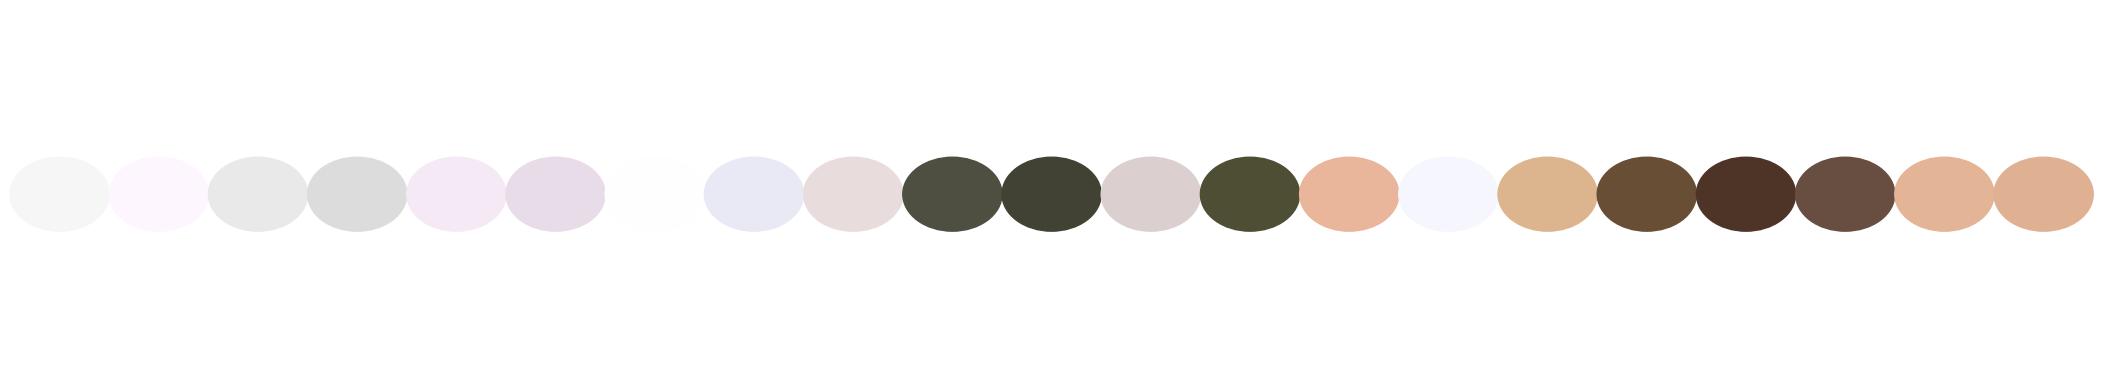

In [40]:
fig, ax = plt.subplots()

i = 0
for color in RGB:
    circle = plt.Circle((i*0.2, 0.5), 0.1, color=[c / 256 for c in color], clip_on=False)
    ax.add_artist(circle)
    i += 1
    
plt.axis('off')
plt.show()

### Opdracht 2a Clusters zoeken

Voer een clustering uit met GMM. Neem als input de 21 pixels en ga met behulp van GMM **3** clusters zoeken.

C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


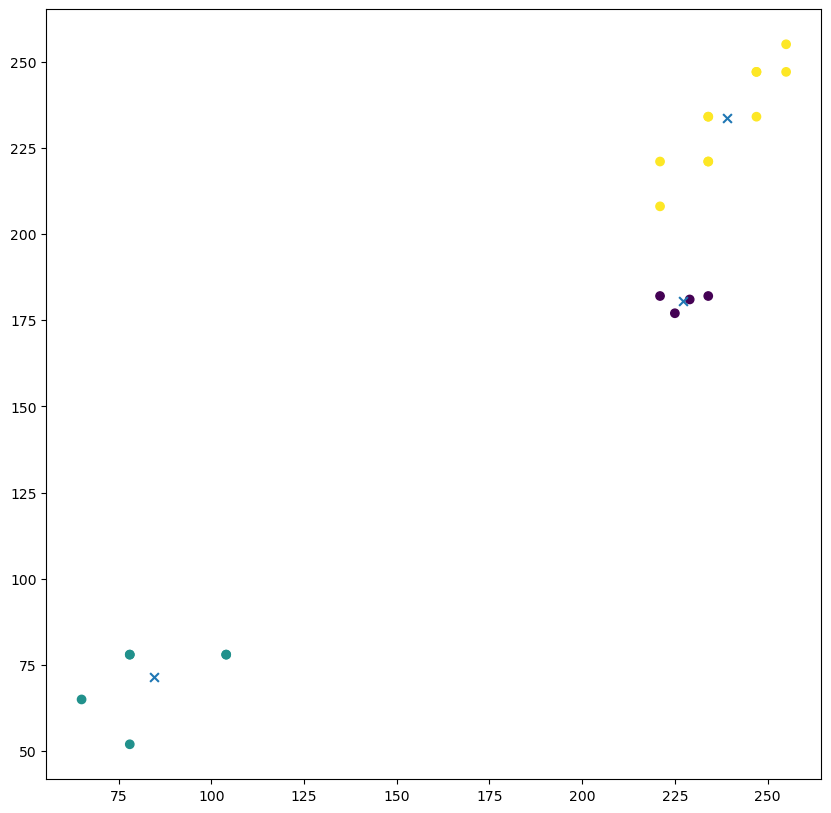

In [41]:
model_gmm = GaussianMixture()
RGB_gmm = RGB
number_clusters = 3
model_gmm.set_params(n_components = number_clusters, random_state = 0)
model_gmm.fit(RGB_gmm)
prediction_gmm = model_gmm.predict(RGB_gmm)

plt.scatter(RGB_gmm[:,0],RGB_gmm[:,1],marker='o', c=prediction_gmm)
plt.scatter(model_gmm.means_[:,0],model_gmm.means_[:,1],marker='x', s=40)
plt.gcf().set_size_inches((10, 10))  
plt.show()

Onderzoek wat de middelpunten van de clusters zijn en welke kleur daar bij hoort. Gebruik de code uit `In [3]:` om de clustermiddelpunten te visualiseren.

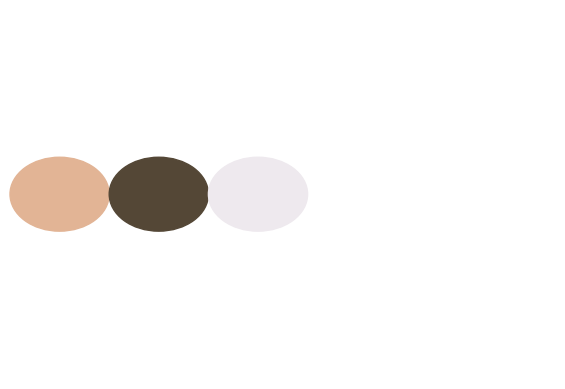

In [60]:
fig, ax = plt.subplots()

i = 0
for color in model_gmm.means_:
    circle = plt.Circle((i*0.2, 0.5), 0.1, color=[c / 256 for c in color], clip_on=False)
    ax.add_artist(circle)
    i += 1
    
plt.axis('off')
plt.show()

Als het goed is komen de RGB-waardes van de clusters ongeveer overeen met respectievelijk de trui, de achtergrond en het gezicht :

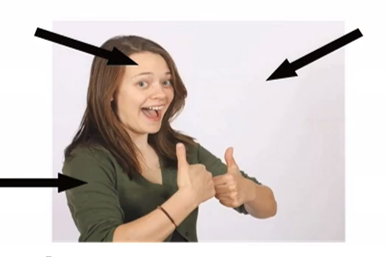

### Opdracht 2b Nieuwe punten aan clusters koppelen

Controleer bij welk cluster de volgende vier pixels horen volgens het model:
- [87,87,76]
- [244,235,237]
- [230, 175, 150 ]
- [255, 0, 0]

Dit zijn steekproeven van respectievelijk de trui, achtergrond en gezicht en een vierde willekeurige kleur die **niet** op de foto voorkomt.

In [61]:
colorsnap = np.array([[87, 87, 76], 
                      [244, 235, 237],
                      [230, 175, 150],
                      [255,  0, 0]])

Vergelijk de kleuren van de drie pixels met de middelpunten van de clusters om te zien of het overeen komt. Als het goed is zie je respectievelijk de kleuren van de trui, achtergrond en gezicht. En wat kun je zeggen over de voorspelling van het vierde punt?

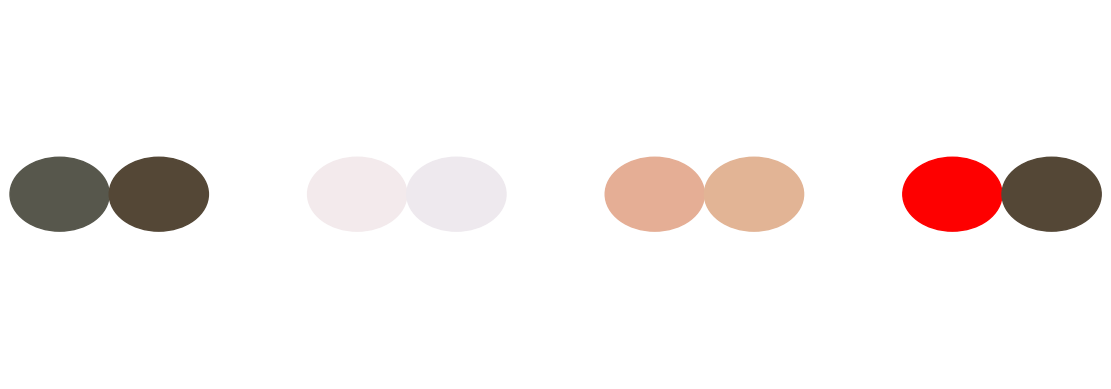

In [62]:
fig, ax = plt.subplots()

i = 0
for x, color in enumerate(colorsnap):
    circle = plt.Circle((i*0.2, 0.5), 0.1, color=[c / 256 for c in color], clip_on=False)
    
    cluster_color = model_gmm.means_[color_snap_cluster_data[x]]
    i += 1
    cluster_circle = plt.Circle((i*0.2, 0.5), 0.1, color=[c / 256 for c in cluster_color], clip_on=False)
    
    ax.add_artist(circle)
    ax.add_artist(cluster_circle)
    i += 2
    
plt.axis('off')
plt.show()

<a id="cl_opdracht3"></a>
## Opdracht 3

In deze opdracht gaan jullie proberen om logische clusters van wijnen te vinden met behulp van unsupervised learning.

We starten met het analyseren en opschonen van de data, dat hoeven jullie niet zelf te doen.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [64]:
redwine = pd.read_csv('redwine.csv', sep=';', encoding="ISO-8859-1")
pd.set_option('display.max_columns', None)
redwine.head()

,id,country,description,designation,points,price,province,taster_name,title,variety,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin OKeefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,10.0,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,Casa Santa Vitória,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,Adega Cooperativa de Borba,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,Quinta de Foz de Arouce,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,Herdade Grande,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


In [65]:
# We zetten hier de index op 'id'
redwine.set_index('id', inplace=True)

### Data opschonen

In [66]:
# Missing values
redwine.isna().sum()

country                   0
description               0
designation             153
points                    0
price                   269
province                  0
taster_name               0
title                     0
variety                   0
winery                    0
fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
dtype: int64

In [67]:
# NaNs droppen
redwine.dropna(inplace=True)

In [68]:
# Hier zien we alle kolommen van de dataset van de rode wijn en hun datatypen
# We zien hier een aantal rare datatypen, dit gaan we veranderen in de volgende regels aan code
redwine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2064 entries, 1 to 2466
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               2064 non-null   object 
 1   description           2064 non-null   object 
 2   designation           2064 non-null   object 
 3   points                2064 non-null   int64  
 4   price                 2064 non-null   float64
 5   province              2064 non-null   object 
 6   taster_name           2064 non-null   object 
 7   title                 2064 non-null   object 
 8   variety               2064 non-null   object 
 9   winery                2064 non-null   object 
 10  fixed acidity         2064 non-null   float64
 11  volatile acidity      2064 non-null   float64
 12  citric acid           2064 non-null   object 
 13  residual sugar        2064 non-null   float64
 14  chlorides             2064 non-null   float64
 15  free sulfur dioxide   2064

In [69]:
# Foute waarde(n) op 'citric acid' kolom bekijken
redwine[np.isnan(pd.to_numeric(redwine["citric acid"], errors="coerce"))]

,country,description,designation,points,price,province,taster_name,title,variety,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,,,,,,,,,,,
23,Portugal,This deeply impressive blend of 20 different v...,Abandonado,94,85.0,Douro,Kerin OKeefe,Alves de Sousa 2013 Abandonado Red (Douro),Portuguese Red,Alves de Sousa,5.1,0.420,-,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6
42,Portugal,Smooth red-berry fruits give this wine a glow ...,Fortissimo,87,15.0,Alentejano,Sean P. Sullivan,Casa Santos Lima 2015 Fortissimo Red (Alentejano),Portuguese Red,Casa Santos Lima,8.7,0.840,-,1.4,0.065,24.0,33.0,0.9954,3.27,0.55,9.7
47,Portugal,"This simple, open and fruity wine has gentle t...",Beyra Colheita,87,12.0,Beira Interior,Matt Kettmann,Rui Roboredo Madeira 2015 Beyra Colheita Red (...,Portuguese Red,Rui Roboredo Madeira,7.0,0.685,-,1.9,0.099,9.0,22.0,0.99606,3.34,0.60,9.7
51,Portugal,"This is a fruity, juicy wine with wood and bri...",Très Bagos Reserva,88,15.0,Douro,Jim Gordon,Lavradores de Feitoria 2014 Très Bagos Reserva...,Portuguese Red,Lavradores de Feitoria,6.8,0.770,-,1.8,0.066,34.0,52.0,0.9976,3.62,0.68,9.9
60,Portugal,The wine is fresh with red berry flavors and a...,Bastardo! Black Edition Tinto,84,25.0,Tejo,Joe Czerwinski,Wine with Spirit 2013 Bastardo! Black Edition ...,Portuguese Red,Wine with Spirit,8.1,0.870,-,3.3,0.096,26.0,61.0,100.025,3.60,0.72,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,Portugal,This is gentle and soft with red berry fruits ...,Marquês de Marialva Colheita Seleccionada,84,12.0,Bairrada,Kerin OKeefe,Adega de Cantanhede 2012 Marquês de Marialva C...,Portuguese Red,Adega de Cantanhede,7.0,0.590,-,1.7,0.052,3.0,8.0,0.996,3.41,0.47,10.3
2422,Portugal,This perfumed old-vine field blend is rich and...,Lua Cheia em Vinhas Velhas,90,14.0,Douro,Virginie Boone,Wines & Winemakers 2015 Lua Cheia em Vinhas Ve...,Portuguese Red,Wines & Winemakers,7.8,0.645,-,5.5,0.086,5.0,18.0,0.9986,3.40,0.55,9.6
2426,Portugal,"This smooth, rich wine exudes southern warmth,...",Monte Cascas Colheita,88,13.0,Alentejano,Roger Voss,Casca Wines 2015 Monte Cascas Colheita Red (Al...,Portuguese Red,Casca Wines,9.1,0.600,-,1.9,0.058,5.0,10.0,0.9977,3.18,0.63,10.4


In [70]:
# In het dataframe wordt gecheckt of iets GEEN (~) NaN is NA de to_numeric check,
# dus als to_numeric iets NIET naar NaN zet (dus als er al goeie waarde in zit),
# wordt het meegenomen in redwine
redwine = redwine[~np.isnan(pd.to_numeric(redwine["citric acid"], errors="coerce"))]

In [71]:
# Foute waarde(n) op 'density' kolom bekijken
redwine[np.isnan(pd.to_numeric(redwine["density"], errors="coerce"))]

,country,description,designation,points,price,province,taster_name,title,variety,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,,,,,,,,,,,
1475,Portugal,"With David Baverstock, winemaker for Herdade d...",Sonhador,90,25.0,Alentejano,Michael Schachner,Howard's Folly 2011 Sonhador Red (Alentejano),Portuguese Red,Howard's Folly,13.0,0.47,0.49,4.3,0.085,6.0,47.0,.,3.3,0.68,12.7


In [72]:
# Foute waarde veranderen naar NaN zodat we deze kunnen verwijderen
redwine = redwine[~np.isnan(pd.to_numeric(redwine["density"], errors="coerce"))]

In [73]:
# Foute waarde(n) op 'alcohol' kolom bekijken
redwine[np.isnan(pd.to_numeric(redwine["alcohol"], errors="coerce"))]

,country,description,designation,points,price,province,taster_name,title,variety,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,,,,,,,,,,,
1345,Portugal,"A dark-colored, wood-aged wine, this is seriou...",Herdade da Farizoa Grand Escolha,92,55.0,Alentejano,Michael Schachner,Companhia das Quintas 2009 Herdade da Farizoa ...,Portuguese Red,Companhia das Quintas,11.6,0.475,0.4,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,100.333.333.333.333
1346,Portugal,"Huge and rich, this offers ripe black fruits a...",Quinta da Fronteira Selecção do Enólogo,92,20.0,Douro,Paul Gregutt,Companhia das Quintas 2009 Quinta da Fronteira...,Portuguese Red,Companhia das Quintas,11.6,0.475,0.4,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,100.333.333.333.333
1621,Portugal,"Almost black in color, this powerful wine from...",Passagem Reserva,92,20.0,Douro,Michael Schachner,Quinta das Bandeiras 2013 Passagem Reserva Red...,Portuguese Red,Quinta das Bandeiras,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.066.666.666.666.600
1671,Portugal,"This is a powerful ripe wine, packed with blac...",Reserva,92,20.0,Douro,Roger Voss,Quinta da Rede 2015 Reserva Red (Douro),Portuguese Red,Quinta da Rede,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,956.666.666.666.667
1765,Portugal,This is a rich wine dominated by ripe Alicante...,Bátoreus Selection,88,16.0,Tejo,Virginie Boone,Terra Silvestre 2014 Bátoreus Selection Red (T...,Portuguese Red,Terra Silvestre,11.6,0.475,0.4,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,100.333.333.333.333
1766,Portugal,A year's barrel aging has smoothed the firm ta...,Reserva,88,18.0,Alentejo,Matt Kettmann,Adega Cooperativa de Borba 2013 Reserva Red (A...,Portuguese Red,Adega Cooperativa de Borba,11.6,0.475,0.4,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,100.333.333.333.333
1767,Portugal,"Open and fruity, this delicious, already drink...",Bridão Classico,88,8.0,Tejo,Virginie Boone,Adega Cooperativa do Cartaxo 2012 Bridão Class...,Portuguese Red,Adega Cooperativa do Cartaxo,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,923.333.333.333.333
1795,Portugal,"As its name suggests, this is a selection of b...",Lagoalva Barrel Selection,88,22.0,Tejo,Roger Voss,Quinta da Lagoalva de Cima 2015 Lagoalva Barre...,Portuguese Red,Quinta da Lagoalva de Cima,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,956.666.666.666.667
1796,Portugal,This is a wood-aged blend of Alicante Bouschet...,Lobo e Falcão Reserva,88,20.0,Tejo,Paul Gregutt,Quinta do Casal Branco 2014 Lobo e Falcão Rese...,Portuguese Red,Quinta do Casal Branco,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.066.666.666.666.600


In [74]:
# Foute waarde veranderen naar NaN zodat we deze kunnen verwijderen
redwine = redwine[~np.isnan(pd.to_numeric(redwine["alcohol"], errors="coerce"))]

In [75]:
redwine.isna().sum()

country                 0
description             0
designation             0
points                  0
price                   0
province                0
taster_name             0
title                   0
variety                 0
winery                  0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [76]:
# Datatypes aanpassen
redwine["citric acid"] = redwine["citric acid"].astype("float")
redwine["density"] = redwine["density"].astype("float")
redwine["alcohol"] = redwine["alcohol"].astype("float")

In [77]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 1 to 2466
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               1880 non-null   object 
 1   description           1880 non-null   object 
 2   designation           1880 non-null   object 
 3   points                1880 non-null   int64  
 4   price                 1880 non-null   float64
 5   province              1880 non-null   object 
 6   taster_name           1880 non-null   object 
 7   title                 1880 non-null   object 
 8   variety               1880 non-null   object 
 9   winery                1880 non-null   object 
 10  fixed acidity         1880 non-null   float64
 11  volatile acidity      1880 non-null   float64
 12  citric acid           1880 non-null   float64
 13  residual sugar        1880 non-null   float64
 14  chlorides             1880 non-null   float64
 15  free sulfur dioxide   1880

## Voorbeeld clusters vinden
In dit voorbeeld kijken we of je clusters kunt vinden door te kijken naar de prijs en het aantal punten van een wijn.

In [78]:
# kMeans en GMM maken gebruik van afstandsmaten, daarom is standaardiseren belangrijk
redwine.reset_index(inplace = True)

scaler = StandardScaler()
scaler.fit(redwine[['points', 'price']])
redwine_z = pd.DataFrame(scaler.transform(redwine[['points', 'price']]), columns=['points_z', 'price_z'])
redwine[['points_z', 'price_z']] = redwine_z

In [79]:
redwine.head()

,id,country,description,designation,points,price,province,taster_name,title,variety,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,points_z,price_z
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin OKeefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,10.0,0.29,0.40,2.9,0.098,10.0,26.0,10.00600,3.48,0.91,9.7,-0.648254,-0.375371
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,Casa Santa Vitória,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,0.714203,0.046422
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,Adega Cooperativa de Borba,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,0.373589,0.123111
3,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,Herdade Grande,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.99360,3.28,0.66,12.4,1.054817,0.353180
4,6,Portugal,This is a new wine from the hands of master wi...,Monte de Carrapatelo Colheita Seleccionada Tinto,92,30.0,Alentejano,Michael Schachner,Luis Duarte 2013 Monte de Carrapatelo Colheita...,Portuguese Red,Luis Duarte,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,1.054817,0.199801


In [86]:
# Maken van een willekeurige clustering
model_kMeans = KMeans(n_clusters=4, random_state=0)
X_kMeans = redwine[['points_z', 'price_z']]

# Clusters 'voorspellen' en opslaan
prediction_kMeans = model_kMeans.fit_predict(X_kMeans)
redwine['cluster_number'] = model_kMeans.predict(X_kMeans)    

C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


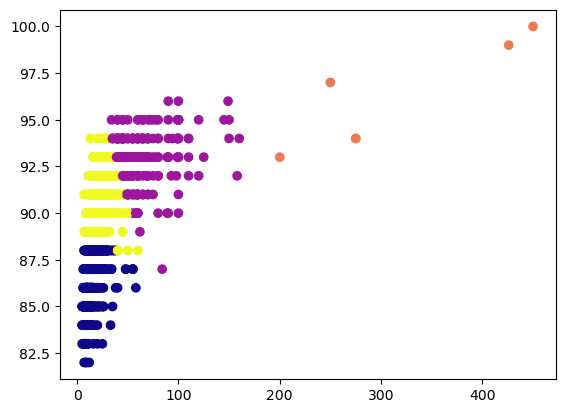

In [87]:
# Plotten van 'price' en 'points' en als kleur de clusters
plt.scatter(redwine['price'], redwine['points'], c=redwine['cluster_number'], cmap='plasma')
plt.show()

Je ziet hierboven de 5 gevonden clusters. Je zou deze op de volgende manier logisch kunnen verklaren:
- Goedkopere wijnen met een lage score, 
- Goedkopere wijnen met medium score, 
- Goedkopere wijnen met een hoge score,
- Duurdere wijnen met een medium tot hoge score,
- Superdure wijnen met een superhoge score.

### Opdracht 3a

Ga zoeken welke *k* qua data de meest logische clustering oplevert. Ga kijken naar *de knik*. Levert dit ook logischere clusters op qua betekenis?


C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

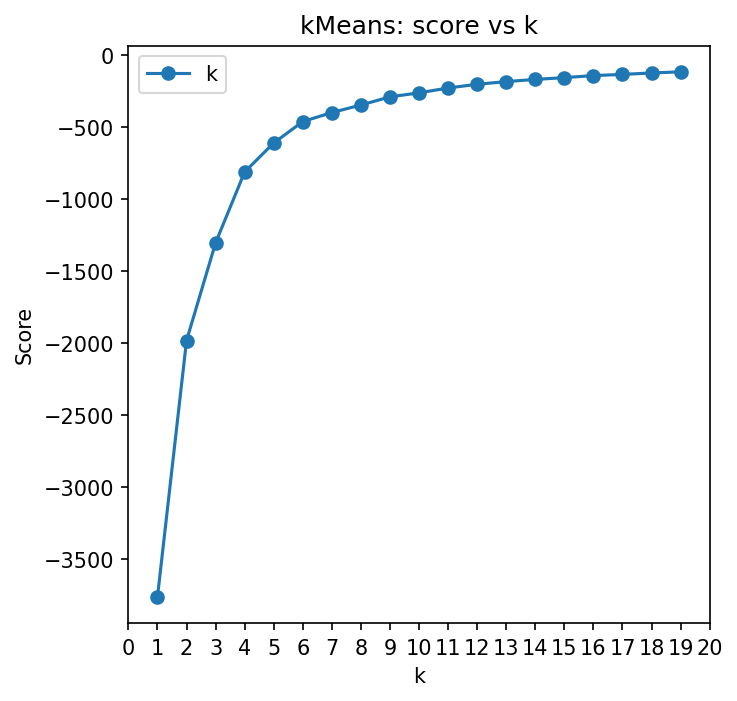

In [85]:
data = []

max_n = 20

for i in range(1, max_n):
    model_kMeans = KMeans(n_clusters=i, random_state=0)
    prediction_kMeans = model_kMeans.fit_predict(X_kMeans)
    data.append([i, model_kMeans.score(X_kMeans)])

df = pd.DataFrame(data, columns=['k', 'Score'])

fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.axes()

ax.set(xlim=(0,max_n),
       xlabel='k',
       ylabel='Score',
       title='kMeans: score vs k')

ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.ticklabel_format(useOffset=False)
ax.plot(df['k'], df['Score'], '-o')

ax.legend(['k'])

### Opdracht 3b

Doe hetzelfde maar dan met GMM.

      points_z   price_z
0    -0.648254 -0.375371
1     0.714203  0.046422
2     0.373589  0.123111
3     1.054817  0.353180
4     1.054817  0.199801
...        ...       ...
1875  0.032974  0.008077
1876  0.032974 -0.375371
1877  1.395431  1.350145
1878  1.395431  0.544904
1879  0.373589 -0.375371

[1880 rows x 2 columns]


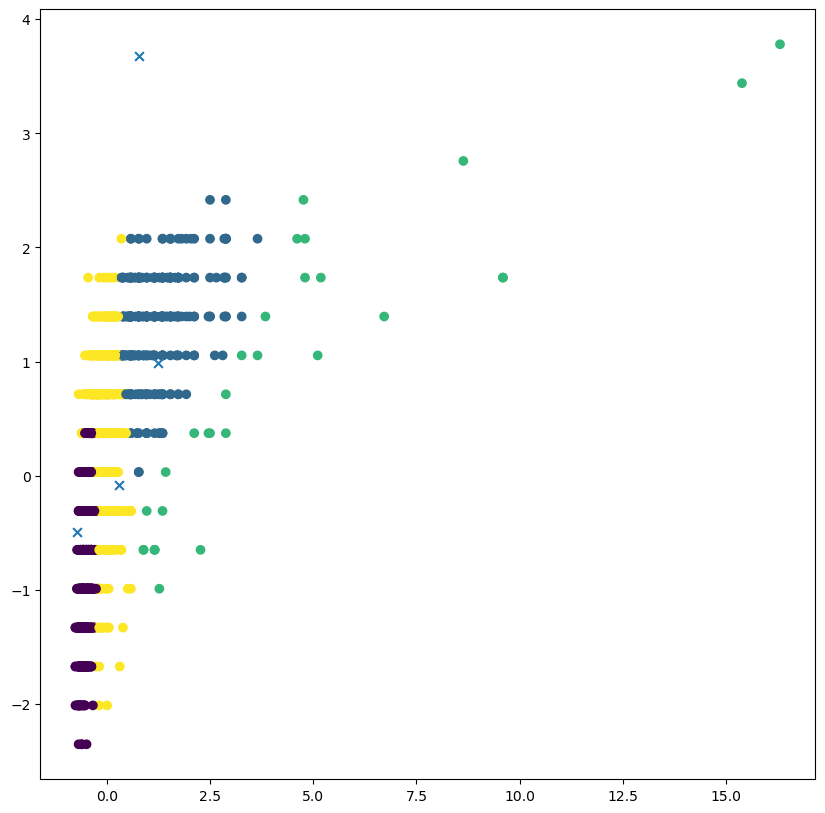

In [92]:
model_gmm = GaussianMixture()

X_gmm = redwine[['points_z', 'price_z']]

number_clusters = 4
model_gmm.set_params(n_components = number_clusters, random_state = 0)

model_gmm.fit(X_gmm)

prediction_gmm = model_gmm.predict(X_gmm)

print(X_gmm)

# In de scatterplot heb ik de middelpunten toegevoegd
plt.scatter(X_gmm['price_z'], X_gmm['points_z'],marker='o', c=prediction_gmm)
plt.scatter(model_gmm.means_[:,0],model_gmm.means_[:,1],marker='x', s=40)
plt.gcf().set_size_inches((10, 10))  
plt.show()

### Opdracht 3c

Voeg meerdere features toe aan de clustering en bepaal of dat meer logische clusters oplevert. Tip: maak meerdere vergelijkbare plots als hierboven maar dan met 2 van de *x* gekozen features.

C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mastr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

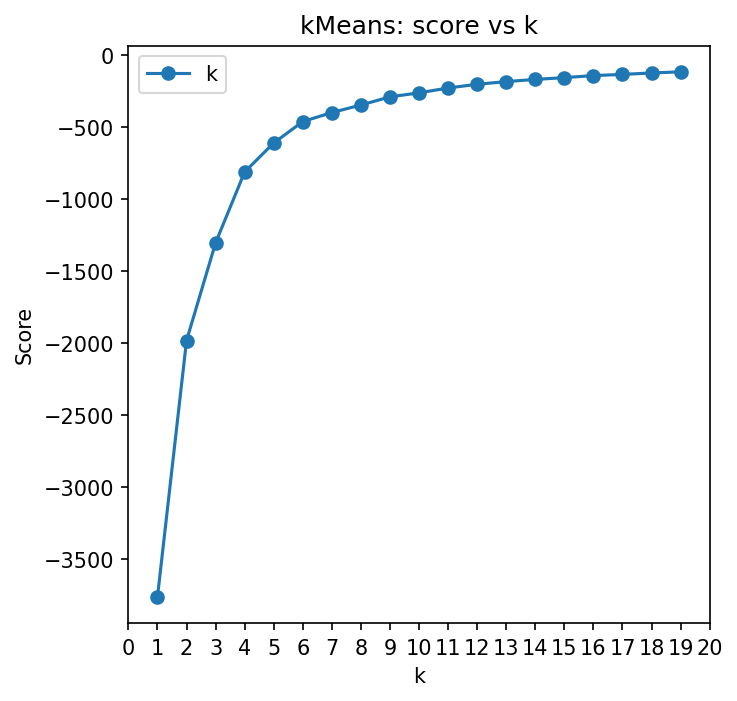

In [93]:
data = []

max_n = 20

for i in range(1, max_n):
    model_gmm = KMeans(n_clusters=i, random_state=0)
    prediction_kMeans = model_gmm.fit_predict(X_kMeans)
    data.append([i, model_gmm.score(X_kMeans)])

df = pd.DataFrame(data, columns=['k', 'Score'])

fig = plt.figure(figsize=(5,5), dpi=150)

ax = plt.axes()

ax.set(xlim=(0,max_n),
       xlabel='k',
       ylabel='Score',
       title='kMeans: score vs k')

ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.ticklabel_format(useOffset=False)
ax.plot(df['k'], df['Score'], '-o')

ax.legend(['k'])